In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import 

In [3]:
import numpy as np
import pandas as pd       

# import packages

response=open('dictionary.txt','r')
train = response.read()

import bs4 as bs
import nltk
# nltk.download('all')
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

eng_stopwords = stopwords.words('english')

In [4]:
from nltk.corpus import stopwords
from nltk.util import ngrams


ps = PorterStemmer()
wnl = WordNetLemmatizer()

def review_cleaner(review,lemmatize=True,stem=False):
    '''
    Clean and preprocess a review.

    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    #1. Remove HTML tags
    review = bs.BeautifulSoup(review).text

    
    #2. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #3. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #4.Set stopwords
    eng_stopwords = set(stopwords.words("english"))

    clean_review=[]
    for word in review:
        if word not in eng_stopwords:
            if lemmatize is True:
                word=wnl.lemmatize(word)
            elif stem is True:
                if word == 'oed':
                    continue
                word=ps.stem(word)
            clean_review.append(word)
    return(clean_review)

In [7]:
num_reviews = len(train)

review_clean_original = []

for i in range(0,num_reviews):
    if( (i+1)%5000 == 0 ):
        # print progress
        print("Done with %d words" %(i+1)) 
    review_clean_original.append(review_cleaner(train[i]))

Done with 5000 reviews
Done with 10000 reviews
Done with 15000 reviews
Done with 20000 reviews
Done with 25000 reviews
Done with 30000 reviews
Done with 35000 reviews
Done with 40000 reviews
Done with 45000 reviews
Done with 50000 reviews
Done with 55000 reviews
Done with 60000 reviews
Done with 65000 reviews
Done with 70000 reviews
Done with 75000 reviews
Done with 80000 reviews
Done with 85000 reviews
Done with 90000 reviews
Done with 95000 reviews
Done with 100000 reviews
Done with 105000 reviews
Done with 110000 reviews
Done with 115000 reviews
Done with 120000 reviews
Done with 125000 reviews
Done with 130000 reviews
Done with 135000 reviews
Done with 140000 reviews
Done with 145000 reviews
Done with 150000 reviews
Done with 155000 reviews
Done with 160000 reviews
Done with 165000 reviews
Done with 170000 reviews
Done with 175000 reviews
Done with 180000 reviews
Done with 185000 reviews
Done with 190000 reviews
Done with 195000 reviews
Done with 200000 reviews
Done with 205000 rev

In [38]:
sentences=review_clean_original
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 10   # ignore all words with total frequency lower than this                       
num_workers = 4       # Number of threads to run in parallel
context = 15          # Context window size                                                                                    


# Initialize and train the model (this will take some time)
from gensim.models import word2vec


print("Training word2vec model... ")
model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context)

#sg=1 for skip-gram model
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "DODDictionary"
model.save(model_name)

Training word2vec model... 


In [39]:
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))
X = model[vocab_tmp]

Vocab length: 957


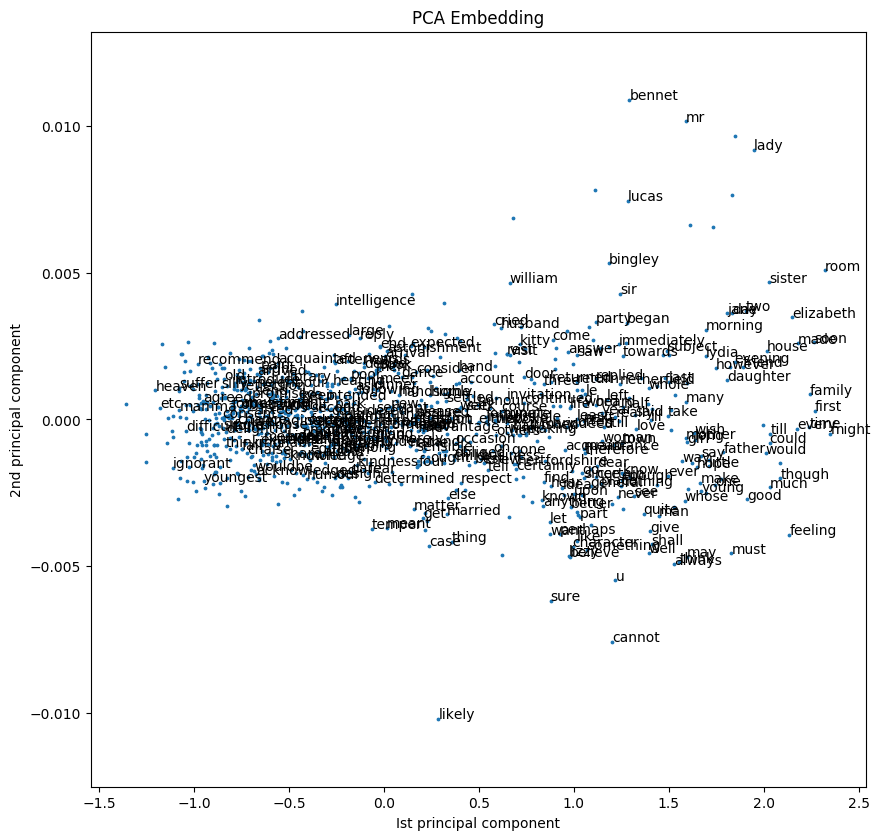

In [40]:
from sklearn import decomposition
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(X)

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']



plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')


plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:300]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.title("PCA Embedding")
plt.show()


In [41]:
model.corpus_count

5370

In [42]:
# Get cosine similarity of words
from sklearn.metrics.pairwise import cosine_similarity

model.most_similar('bennet')

[('darcy', 0.9999682307243347),
 ('collins', 0.999964714050293),
 ('friend', 0.9999626874923706),
 ('soon', 0.999961256980896),
 ('sister', 0.999961256980896),
 ('might', 0.9999611377716064),
 ('gardiner', 0.9999607801437378),
 ('evening', 0.9999602437019348),
 ('elizabeth', 0.9999593496322632),
 ('first', 0.9999589920043945)]

In [43]:
model.similarity('feeling','elizabeth')

0.99997226764711744

In [44]:
model.similarity('kitty','catherine')

0.9999306245830446

In [45]:
model.doesnt_match("jane mary catherine caroline".split())

'caroline'

In [46]:
model.doesnt_match("elizabeth jane mary lydia catherine charles".split())

'catherine'

In [47]:
model.similarity('catherine','silly')

0.99972731849285101

In [48]:
model.most_similar('love')

[('first', 0.9999735951423645),
 ('soon', 0.9999715685844421),
 ('happiness', 0.9999703168869019),
 ('feeling', 0.9999701976776123),
 ('might', 0.9999700784683228),
 ('though', 0.9999699592590332),
 ('could', 0.9999698400497437),
 ('pleasure', 0.9999696016311646),
 ('much', 0.999969482421875),
 ('would', 0.999969482421875)]

In [49]:
vocab_tmp[0:10]

['truth',
 'acknowledged',
 'single',
 'man',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however']

In [50]:
model['truth'].shape

(300,)

In [51]:
model['acknowledged'].shape

(300,)

In [52]:
model['however'].shape

(300,)